In [2]:
import uproot
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from collections import defaultdict
import matplotlib.ticker as mtick
import matplotlib
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=matplotlib.colormaps['tab10'].colors)

In [3]:

def get_path_ZZ(mass, i):
    return f"/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/GluGluToXToZZTo2B2Tau_M{mass}/cat_base_selection/prod_241213c/data_{i}.root:Events"
def get_path_ZbbHtt(mass, i):
    return f"/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M{mass}/cat_base_selection/prod_241213c/data_{i}.root:Events"
def open_file(mass):
    return uproot.concatenate([get_path_ZbbHtt(mass, i) for i in [0, 1]],
        filter_name=["event", "luminosityBlock",
            #"GenPart_pdgId", "GenPart_genPartIdxMother", "GenPart_eta", "GenPart_phi", "GenPart_pt",
            "cutflow*", "*pairType*", "is*", "*enPair*", "genDau*", "dau*", "gen_*", "genXbb*",
        "HLT_PFMETNoMu120_PFMHTNoMu120*", "HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight*", "HLT_PFMET120_PFMHT120_*",
        "fatjet_JetIdx", "FatJet_pt", "FatJet_eta", "FatJet_phi", "FatJet_mass", "FatJet_msoftdrop", "FatJet_jetId", "FatJet_particleNetLegacy_Xbb", "FatJet_particleNetLegacy_QCD"
        ],
        how="zip")

ars_raw = {mass : open_file(mass)
       for mass in 
        #[200, 1000, 2000, 3000, 4000, 5000] #
       # [ 200, 230,  250, 270,  300, 350, 400, 450, 500, 550, # 210, 220, 230, 240, 260, 270, 280,  320,  360,
       #          600, 650, 700, 750, 800, 850, 900, 1000, 1200,  1400, 1600,
       #          1800,  2000,   2500,  3000, 3500, 4000, 4500, 5000]
                # ZH masses
         [500, 1000, 2000, 3000, 4000, 5000, 6000]     
                }
#ar_raw = {mass : ak.concatenate(ars) for mass, ars in ar_raw.items()}

In [2]:
ar_test = uproot.concatenate(["/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/GluGluToXToZZTo2B2Tau_M5000/cat_base/prod_241208/data_1.root"],
        filter_name=[
            #"GenPart_pdgId", "GenPart_genPartIdxMother", "GenPart_eta", "GenPart_phi", "GenPart_pt",
            "FatJet_*",
            "cutflow*", "*pairType*", "is*", "*enPair*", "genDau*", "genXbb*", "dau*",
        "HLT_PFMETNoMu120_PFMHTNoMu120*", "HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight*", "HLT_PFMET120_PFMHT120_*",
        "fatjet_JetIdx", "gen_*",  "GenPart*"
        ],
        how="zip")

In [4]:
def eff(branch_num, filter_denom):
    try:
        return ak.count_nonzero(branch_num) / ak.count_nonzero(filter_denom)
    except:
        return ak.count_nonzero(branch_num) / len(filter_denom)
def delta_phi(a, b):
    """Compute difference in angle given two angles a and b

    Returns a value within [-pi, pi)
    """
    return (a - b + np.pi) % (2 * np.pi) - np.pi

def delta_r(eta1, phi1, eta2, phi2):
    r"""Distance in (eta,phi) plane given two pairs of (eta,phi)

    :math:`\sqrt{\Delta\eta^2 + \Delta\phi^2}`
    """
    deta = eta1 - eta2
    dphi = delta_phi(phi1, phi2)
    return np.hypot(deta, dphi)
def boosted_jet_gen(ar, deltaR_bb=0.8):
    return (ar.gen_deltaR_bb < deltaR_bb ) & (ar.genXbb_pt > 250) & (ar.genXbb_eta < 2.4)

In [6]:
ar_test = ars_raw[5000]
ar = ar_test[boosted_jet_gen(ar_test) & (ar_test.pairType_boostedTaus>=0) & (ar_test.cutflow_jets_wrongFatJet)]
ar.FatJet[0][["eta", "phi"]]

<Array [{eta: 0.273, phi: -1.97}, {...}] type='2 * {eta: float32, phi: floa...'>

In [10]:
for x in ar[["event", "luminosityBlock"]]:
    print(f"({x.event}, {x.luminosityBlock}), ", end="", flush=False)

(1007, 2), (1031, 2), (1043, 2), (1089, 2), (1118, 2), (1145, 2), (1167, 2), (1189, 2), (1212, 2), (1270, 2), (1314, 2), (1324, 2), (1321, 2), (1342, 2), (1366, 2), (1391, 2), (1396, 2), (1388, 2), (1406, 2), (1420, 2), (1422, 2), (1450, 2), (1452, 2), (1455, 2), (1445, 2), (1482, 2), (1505, 2), (1516, 2), (1501, 2), (1513, 2), (1547, 2), (1537, 2), (1536, 2), (1550, 2), (1552, 2), (1581, 2), (1599, 2), (1619, 2), (1622, 2), (1620, 2), (1648, 2), (1651, 2), (1646, 2), (1656, 2), (1698, 2), (1724, 2), (1721, 2), (1753, 2), (1756, 2), (1777, 2), (1796, 2), (1797, 2), (1806, 2), (1809, 2), (1824, 2), (1831, 2), (1839, 2), (1861, 2), (1878, 2), (1884, 2), (1894, 2), (1914, 2), (1946, 2), (1998, 2), (4018, 5), (4014, 5), (4037, 5), (4048, 5), (4056, 5), (4041, 5), (4058, 5), (4055, 5), (4093, 5), (4082, 5), (4090, 5), (4096, 5), (4130, 5), (4161, 5), (4160, 5), (4177, 5), (4187, 5), (4192, 5), (4198, 5), (4206, 5), (4238, 5), (4231, 5), (4240, 5), (4283, 5), (4275, 5), (4311, 5), (4315, 5),

In [9]:
ar[["genXbb_pt", "genXbb_eta", "genXbb_phi"]][0]

<Record {genXbb_pt: 2.49e+03, ...} type='{genXbb_pt: float32, genXbb_eta: f...'>

In [15]:
ar[["dau1_eta", "dau1_phi", "dau2_eta", "dau2_phi"]]

<Array [{dau1_eta: 0.261, ...}, ..., {...}] type='11677 * {dau1_eta: float3...'>

In [14]:
ar.FatJet[["jetId", "msoftdrop", ]][0, 0]

<Record {jetId: 6, msoftdrop: 80.9} type='{jetId: uint8, msoftdrop: float32}'>

In [41]:
ar[["cutflow_fatjet_"+x for x in ["Reco", "Pt", "Eta", "JetID", "JetPUID", "SoftDrop", "DeltaRDau"]] + ["cutflow_jets_wrongFatJet"]][0]

<Record {cutflow_fatjet_Reco: False, ...} type='{cutflow_fatjet_Reco: bool,...'>

In [40]:
ak.full_like(ar.fatjet_JetIdx, ak.enforce_type([None], type="?int32"))

<Array [2147483647, 2147483647, ..., 2147483647] type='63292 * int32'>

In [ ]:
ak.broadcast_arrays(ar.fatjet_JetIdx, ak.enforce_type([None], type="?int32"))

[<Array [None, None, None, None, ..., None, None, None] type='63292 * ?int32'>,
 <Array [None, None, None, None, ..., None, None, None] type='63292 * ?int32'>]

In [16]:
ak.where(ar.fatjet_JetIdx == -1, ar.fatjet_JetIdx, None)

TypeError: Encountered a None value, but None conversion/promotion is disabled

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'),
 supptext: Custom Text(1.012, 1, ''))

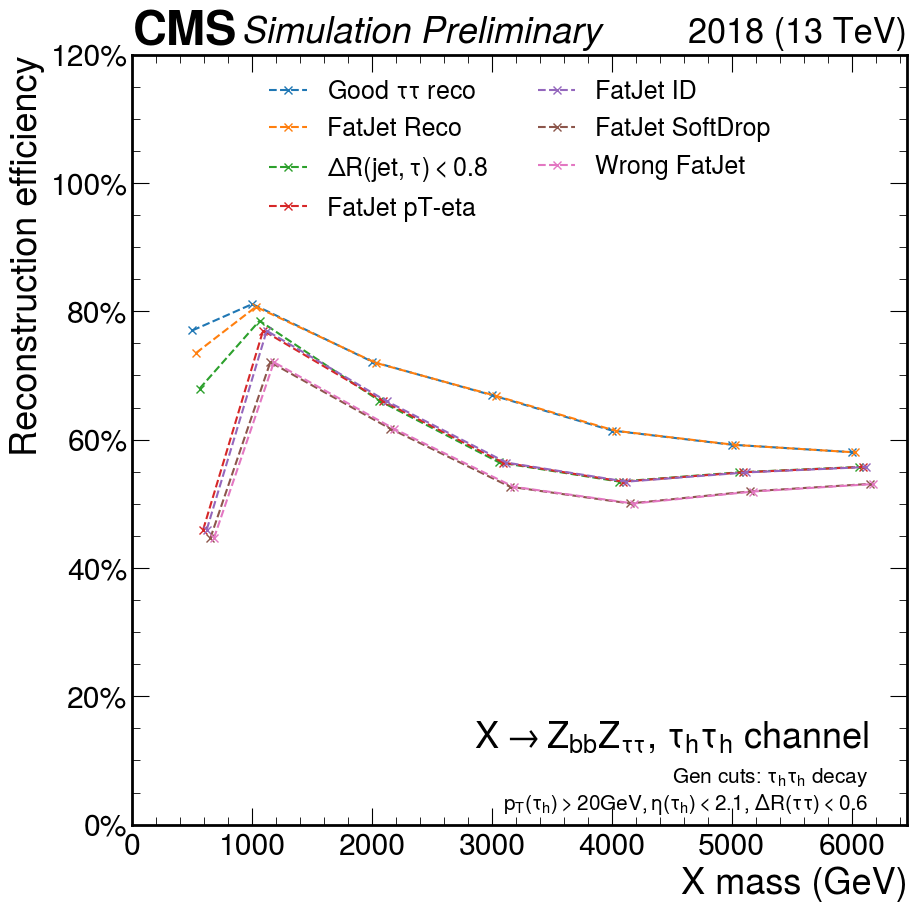

In [6]:
################# 
effs = defaultdict(dict)
#ars_raw = {1000:ar_test}
for mass, ar_noGen in ars_raw.items():
    #if mass < min_mass_threshold: continue
    
    ar = ar_noGen[boosted_jet_gen(ar_noGen) & (ar_noGen.pairType>=0)]
    # cut = boosted_jet_gen(ar)
    # effs["$\Delta R (b,b)<0.8$ (gen)"][mass] = eff(cut, ar)
    cut =  (~ar.cutflow_boostedTaus_dau1_WrongPair & ~ar.cutflow_boostedTaus_dau2_WrongPair)
    effs[r"Good $\tau\tau$ reco"][mass] = eff(cut, ar)

    cut = cut & (~ar.cutflow_fatjet_Reco)
    effs["FatJet Reco"][mass] = eff(cut, ar)

    cut = cut & ~ar.cutflow_fatjet_DeltaRDau
    effs[r"$\Delta R (jet, \tau)<0.8$"][mass] = eff(cut, ar)

    cut = cut & ~ar.cutflow_fatjet_Pt & ~ar.cutflow_fatjet_Eta
    effs["FatJet pT-eta"][mass] = eff(cut, ar)

    # cut = cut & ~ar.cutflow_fatjet_Eta
    # effs["FatJet eta"][mass] = eff(cut, ar)

    cut = cut & ~ar.cutflow_fatjet_JetID & ~ar.cutflow_fatjet_JetPUID
    effs["FatJet ID"][mass] = eff(cut, ar)

    cut = cut & ~ar.cutflow_fatjet_SoftDrop
    effs["FatJet SoftDrop"][mass] = eff(cut, ar)

    # fatjet = ar.FatJet[ar.fatjet_JetIdx]
    # cut = cut &~ar.cutflow_jets_wrongFatJet
    # effs["ParticleNet XbbVsQCD"][mass] = eff(cut, ar)

    cut = cut & ~ar.cutflow_jets_wrongFatJet
    effs["Wrong FatJet"][mass] = eff(cut, ar)

    #effs["Total"][mass] = eff(~ar.cutflow_boostedTaus_dau1_WrongPair & ~ar.cutflow_boostedTaus_dau2_WrongPair & (ar.fatjet_JetIdx >= 0), ar)

    # cut = cut & passMETTrigger(ar)
    # effs["MET triggers"][mass] = eff(cut, ar)

    # cut = cut & passMETOffline(ar)
    # effs["MET offline cut"][mass] = eff(cut, ar)
    #effs["Total"][mass] = eff(ar.pairType_boostedTaus == 2, ar)

x_shift = 0
for key, val in effs.items():
    plt.plot(np.fromiter(val.keys(), dtype=float)+x_shift, val.values(), "x--", label=key)
    x_shift += 30
# plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("X mass (GeV)")
plt.ylabel("Reconstruction efficiency")
plt.ylim(0, 1.2)
plt.xlim(left=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.text(0.95, 0.01,
              r"Gen cuts: $\tau_{h}\tau_{h}$ decay" "\n"
              r"$p_T(\tau_h) > 20 GeV, \eta(\tau_h) < 2.1$, $\Delta R(\tau\tau)<0.6$",
            transform=plt.gca().transAxes, ha="right", va="bottom", fontsize=15)

plt.text(0.95, 0.1, r"$X\to Z_{bb}Z_{\tau\tau}$, $\tau_{h}\tau_{h}$ channel", transform=plt.gca().transAxes, ha="right")

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(loc="upper center", ncols=2, fontsize=18)

hep.cms.label("Preliminary", year=2018)
#plt.savefig("studies/cutflow/cutflow_boostedTaus_tautau.pdf")

In [13]:
ar.fatjet_JetIdx

<Array [-1, -1, -1, -1, -1, -1, ..., -1, -1, -1, -1, -1] type='63292 * int32'>

In [ ]:
a

In [111]:
ak.count_nonzero(ar_test.fatjet_JetIdx>=0)

0